In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("2017_jun_final - 2017_jun_final.csv")


In [3]:
# 1
print(data.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [4]:
# 2
print('Shape ', data.shape)

Shape  (8704, 25)


In [5]:
# 3
print('Data types ' , data.dtypes)

Data types  N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary              

In [6]:
# 4 Calculate missing values in each column

missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent)




N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [22]:
# 5 Remove rows with missing values

data_cleaned = data.dropna(subset=['Мова програмування'], how='any')
print(data_cleaned)

         N                    Посада Мова програмування Спеціалізація  \
2        3         Software Engineer            C#/.NET           NaN   
3        4         Software Engineer         JavaScript           NaN   
4        5  Senior Software Engineer         JavaScript           NaN   
6        7  Junior Software Engineer            C#/.NET           NaN   
7        8  Senior Software Engineer                C++           NaN   
...    ...                       ...                ...           ...   
8692  8693         Software Engineer               Java           NaN   
8694  8695  Junior Software Engineer            C#/.NET           NaN   
8695  8696         Software Engineer             Python           NaN   
8701  8702  Junior Software Engineer         Ruby/Rails           NaN   
8703  8704  Senior Software Engineer               Java           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
2                          4                              

In [23]:
# 6 Display missing values after removal

missing_percent_cleaned = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
print(missing_percent_cleaned)


N                                    0.000000
Посада                               0.000000
Мова програмування                   0.000000
Спеціалізація                       99.979398
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.758962
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    0.618047
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [24]:
# 7
data_cleaned_rows = data.dropna()


In [25]:
# 8

data_cleaned_shape = data_cleaned_rows.shape
print(data_cleaned_shape)

(0, 25)


In [26]:
# 9

python_data = data_cleaned_rows[data_cleaned_rows['Мова програмування'] == 'Python']


In [27]:
# 10

python_data_shape = python_data.shape
print(python_data_shape)


(0, 25)


In [28]:
# 11

grouped_by_position = data_cleaned_rows.groupby('Посада')
aggregated_salary = grouped_by_position['Зарплата на місяць'].agg(['min', 'max'])


In [30]:
# 12

def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean()

# Додайте новий стовпчик "avg" з середніми зарплатами
data_cleaned_rows['avg'] = data_cleaned_rows.apply(fill_avg_salary, axis=1)


In [31]:
# 13

avg_salary_stats = data_cleaned_rows['avg'].describe()
print(avg_salary_stats)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg, dtype: float64


In [32]:
# 15

data_cleaned_rows.to_csv('cleaned_data.csv', index=False)


## **Візуалізація**

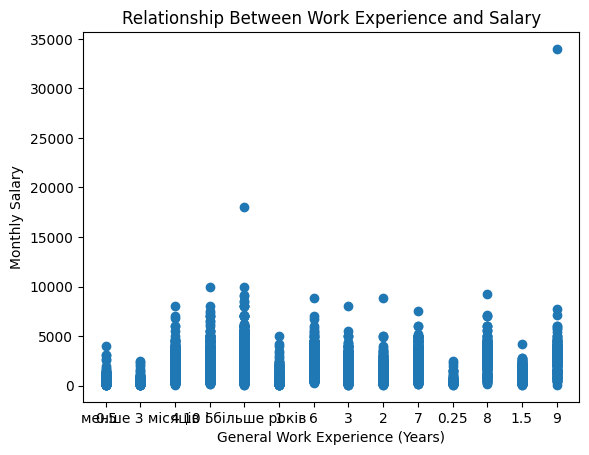

In [9]:
# 1

plt.scatter(data['Загальний досвід роботи'], data['Зарплата на місяць'])
plt.title('Relationship Between Work Experience and Salary')
plt.xlabel('General Work Experience (Years)')
plt.ylabel('Monthly Salary')
plt.show()

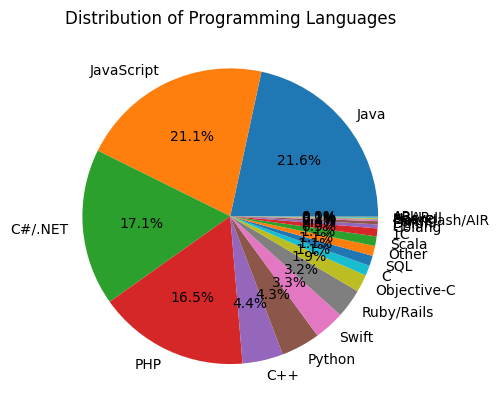

In [10]:
# 2

data['Мова програмування'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Programming Languages')
plt.ylabel('')
plt.show()

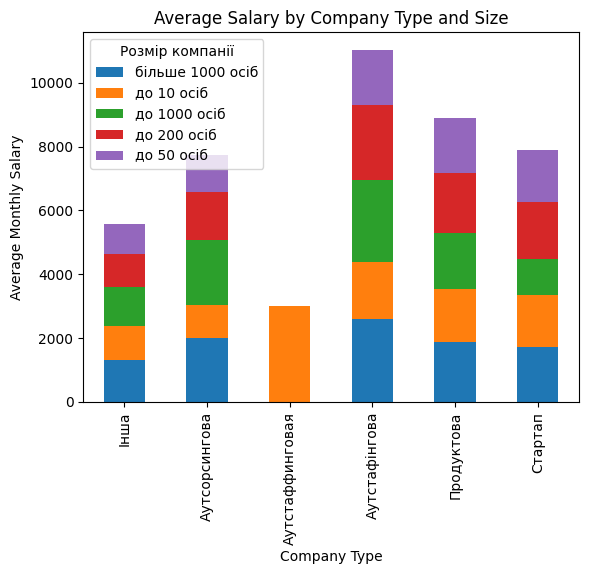

In [11]:
# 3

data.groupby(['Тип компанії', 'Розмір компанії'])['Зарплата на місяць'].mean().unstack().plot(kind='bar', stacked=True)
plt.title('Average Salary by Company Type and Size')
plt.xlabel('Company Type')
plt.ylabel('Average Monthly Salary')
plt.show()

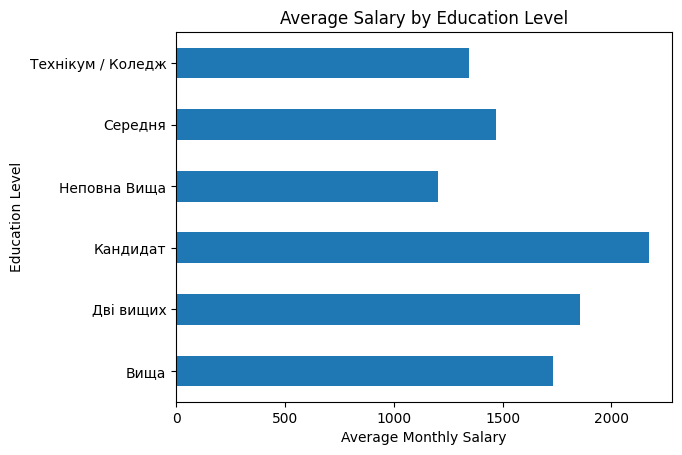

In [14]:
# 4

data.groupby('Освіта')['Зарплата на місяць'].mean().plot(kind='barh')
plt.title('Average Salary by Education Level')
plt.xlabel('Average Monthly Salary')
plt.ylabel('Education Level')
plt.show()